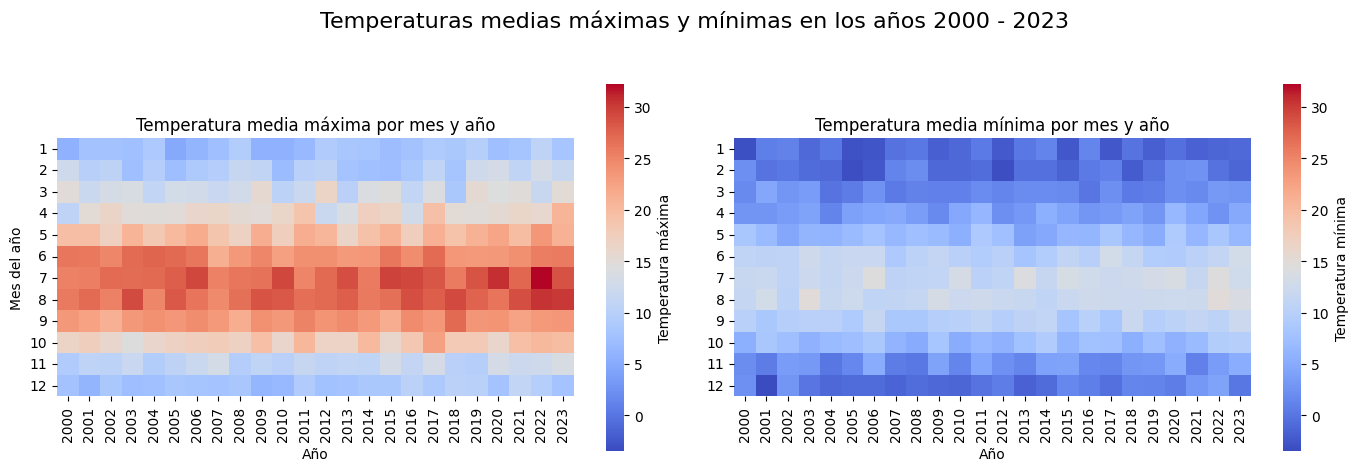

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo Excel
df = pd.read_excel("Excel.xlsx")

# Convertir la columna de FECHA a tipo datetime
df['FECHA'] = pd.to_datetime(df['FECHA'], format='%d/%m/%Y')

# Filtrar los datos para el rango de años especificado
df_filtered = df[(df['FECHA'].dt.year >= 2000) & (df['FECHA'].dt.year <= 2023)]

# Extraer año y mes de la fecha
df_filtered['Año'] = df_filtered['FECHA'].dt.year
df_filtered['Mes'] = df_filtered['FECHA'].dt.month

# Agrupar por mes y año, y calcular la media de las temperaturas máximas y mínimas
df_grouped_tmax = df_filtered.groupby(['Año', 'Mes']).agg({'T. Máxima': 'mean'}).reset_index()
df_grouped_tmin = df_filtered.groupby(['Año', 'Mes']).agg({'T.Mínima': 'mean'}).reset_index()

# Crear una nueva columna que contenga la combinación de mes y año
df_grouped_tmax['Mes_Año'] = df_grouped_tmax['Mes'].astype(str) + '-' + df_grouped_tmax['Año'].astype(str)
df_grouped_tmin['Mes_Año'] = df_grouped_tmin['Mes'].astype(str) + '-' + df_grouped_tmin['Año'].astype(str)

# Utilizar la nueva columna como índice para los heatmaps
plt.figure(figsize=(14, 8))

# Definir la misma escala para ambos heatmaps
vmin = min(df_grouped_tmax['T. Máxima'].min(), df_grouped_tmin['T.Mínima'].min())
vmax = max(df_grouped_tmax['T. Máxima'].max(), df_grouped_tmin['T.Mínima'].max())

# Heatmap para la temperatura máxima
plt.subplot(1, 2, 1)
sns.heatmap(df_grouped_tmax.pivot(index='Mes',columns='Año',values='T. Máxima'), cmap='coolwarm', cbar_kws={'label': 'Temperatura máxima', 'shrink': 0.5}, square=True, vmin=vmin, vmax=vmax)
plt.title('Temperatura media máxima por mes y año')
plt.xlabel('Año')
plt.ylabel('Mes del año')

# Heatmap para la temperatura mínima
plt.subplot(1, 2, 2)
sns.heatmap(df_grouped_tmin.pivot(index='Mes',columns='Año',values='T.Mínima'), cmap='coolwarm', cbar_kws={'label': 'Temperatura mínima', 'shrink': 0.5}, square=True, vmin=vmin, vmax=vmax)
plt.title('Temperatura media mínima por mes y año')
plt.xlabel('Año')
plt.ylabel('')

# Agregar título y subtítulo
plt.suptitle('Temperaturas medias máximas y mínimas en los años 2000 - 2023', fontsize=16, y=0.80)


plt.tight_layout()
plt.show()
